<a href="https://colab.research.google.com/github/riccardomarin/SpectralShapeAnalysis/blob/master/Exercises_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**1D GRAPH**
---
We will implement the 1D graph we saw in the slides.

The tasks are:
- Compute the Laplacian
- Compute the eigenvectors
- Visualize them
- Define a function
- Perform low-pass filtering with increasing number of basis


In [ ]:
# 1: build the graph
n = 50

# Constructing the adjacency matrix
A = np.zeros((n, n))
a = np.array([i for i in np.arange(1,n)]) 
A[np.arange(a.size),a] = 1

# Assuring it is symmetryc
A = np.logical_or(A, A.T).astype(np.int32)

# It generates something like this
# A = np.array([  [0,1,0,0,0],
#                 [1,0,1,0,0],
#                 [0,1,0,1,0],
#                 [0,0,1,0,1],
#                 [0,0,0,1,0]])

In [ ]:
# 2: Compute the Laplacian
# Vertex degree
D = np.sum(A, axis=0)
L =   np.diag(D) - A


In [ ]:
# 3: Compute the eigenvectors
a,b = np.linalg.eigh(L)


In [ ]:
# 4: Plot the graph with one eigenfunction
eig_n = 2

G = nx.from_numpy_matrix(A)

pos = {i : np.asarray([i,0]) for i in np.arange(0,n)}
nx.draw(G,pos, node_color=np.ones(n) , node_size=40)
nx.draw(G,pos, node_color=b[:,2] , node_size=40, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))

plt.show()

# **Disconnected Components**
---
Here we analyze the behavior of Laplacian and eigenfunction when the graph is disconnected.

The tasks are:
- Compute the Laplacian
- Compute the eigenfunction of the Laplacian
- Visualize the Laplacian
- Visualize the Eigenfunctions and the algebraic multiplicity of the 0 eigenvalue


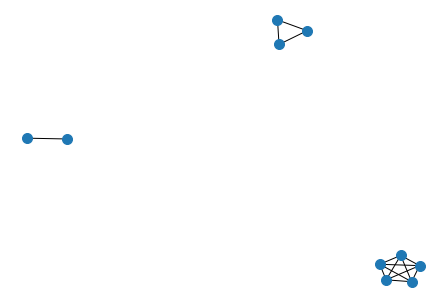

In [27]:
# 1: build the graph

s = np.asarray([1, 1, 2, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 5])-1
t = np.asarray([2, 3, 3, 7, 8, 9, 10, 8, 9, 10, 9, 10, 10, 4])-1

A = np.zeros((10,10))
A[s,t]=1
A = np.logical_or(A, A.T).astype(np.int32)

G = nx.from_numpy_matrix(A)
nx.draw(G, node_size=100)
plt.show()


In [7]:
# 2: Compute the Laplacian
D = np.sum(A, axis=0)
L = np.diag(D) - A

In [13]:
# 3: compute the eigenfunction and eigenvalues
a,b = np.linalg.eigh(L)

print(a)

[-2.22044605e-16  0.00000000e+00  0.00000000e+00  2.00000000e+00
  3.00000000e+00  3.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00]


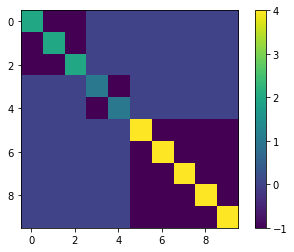

In [14]:
# 4: Show the laplacian
plt.imshow(L)
plt.colorbar()
plt.show()

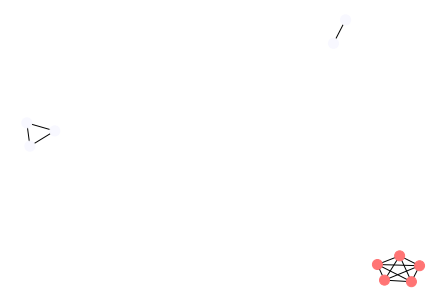

In [26]:
# 5: plot eigenfunctions
nx.draw(G, node_color = b[:,0] , node_size=100, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))
plt.show()